## Análisis Probe Request

A continuación se realizará el analisís a los datos obtenidos mediante detección pasiva de paquetes tipo ProbeRequest




In [45]:
import pandas as pd
import numpy as np
import matplotlib as plt
import sqlite3
from datetime import datetime, timedelta

### Funciones auxiliares

In [38]:
def read_log(infile):
    data = []
    with open(infile) as ifile:
        for line in ifile:
            data.append(line.strip('\n').split('\t'))
    return data

def create_connection(db_file):
    """ create a database connection to the SQLite database
        specified by db_file
    :param db_file: database file
    :return: Connection object or None
    """
    try:
        conn = sqlite3.connect(db_file)
        return conn
    except Error as e:
        print(e)
 
    return None

conn = sqlite3.connect('crowdcounting.db')
dbcursor = conn.cursor()

# df = pd.DataFrame(data, columns=['datetime', 'macaddr', 'vendor', 'ssid', 'rssi'])
# df['datetime'] = pd.to_datetime(df.datetime)

# print(df)

### Estadisticas básicas con Sqlite3

In [56]:
# Registros totales
qry1 = open('sql_queries/total_probes.sql', 'r').read()
total = dbcursor.execute(qry1).fetchall()
print('Registros totales: \n',total[0][0])

# Cantidad de mac unicas
qry2 = open('sql_queries/unique_macaddr.sql').read()
macs = dbcursor.execute(qry2).fetchall()
print('Mac unicas registradas: \n', macs[0][0])

# Unique address grouped by vendor
qry3 = open('sql_queries/unique_addr_vendor_count.sql').read()
address = dbcursor.execute(qry3).fetchall()
print('Cantidad de macs(unicas) por vendedor: \n', address)

# Macaddress captured by vendor
qry4 = open('sql_queries/count_by_vendor.sql').read()
vendors = dbcursor.execute(qry4).fetchall()
print('Cantidad de macs detectadas por fabricante: \n', vendors)

# Registros contados en los ultimos X minutos
qry5 = open('sql_queries/registers_x_last_minutes.sql').read()
days_before = 10
t1 = (datetime.now() - timedelta(days=days_before)).isoformat()
t2 = datetime.now().isoformat()
time_delta = (t1, t2,)
registers = dbcursor.execute(qry5, time_delta).fetchall()
print('Cantidad de registros en los últimos {} días: \n'.format(days_before), registers[0][0])


Registros totales: 
 548
Mac unicas registradas: 
 186
Cantidad de macs(unicas) por vendedor: 
 [(None, 88), ('BbnInter', 1), ('Google', 37), ('HonHaiPr', 2), ('Motorola', 48), ('SamsungE', 9), ('SonyMobi', 1)]
Cantidad de macs detectadas por fabricante: 
 [(None, 201), ('BbnInter', 3), ('Google', 41), ('HonHaiPr', 49), ('Motorola', 93), ('SamsungE', 124), ('SonyMobi', 37)]
Cantidad de registros en los últimos 10 días: 
 0


### Estádisticas basicas

Registros totales: 
 datetime    211
macaddr     211
vendor      211
ssid        143
rssi        143
dtype: int64 

Mac unicas: 
 11
SSIDS unicas: 
 5
Vendedor más comun: 
 0    Motorola
dtype: object


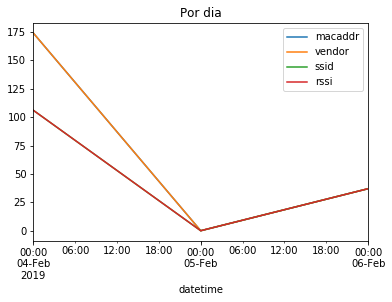

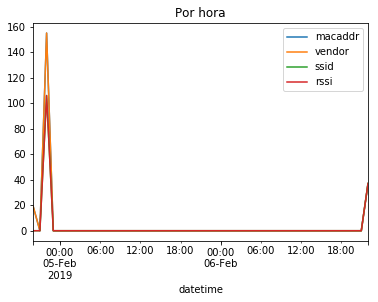

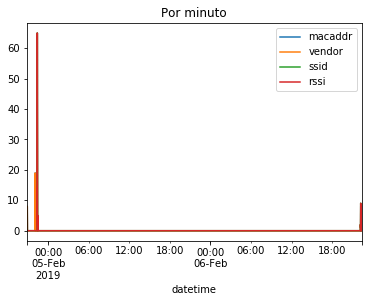

In [44]:
# Registros totales
print('Registros totales: \n', df.count(), '\n')

# Mac unicas
print('Mac unicas: \n', len(df.macaddr.value_counts()))

# SSID unicas
print('SSIDS unicas: \n', len(df.ssid.value_counts()))

# Moda de vendedores
print('Vendedor más comun: \n', df.vendor.mode())

# Registros por segundo
def group_by_seconds(df,seconds):
    seconds = '{}s'.format(seconds)
    _grouping = df.groupby(pd.Grouper(key='datetime', freq=seconds)).count()
    return _grouping

group_1day = group_by_seconds(df, 86400).plot(title='Por dia', kind='line')
group_1hour = group_by_seconds(df, 3600).plot(title='Por hora', kind='line')
group_1minute = group_by_seconds(df, 60).plot(title='Por minuto', kind='line')j


                       vendor
macaddr                      
2c:59:e5:ed:f7:2d  [HewlettP]
3c:05:18:ad:17:e8  [SamsungE]
48:d6:d5:1a:e6:14    [Google]
5c:51:88:8d:d2:a6  [Motorola]
84:55:a5:aa:34:ee  [SamsungE]
88:75:98:05:9f:02  [SamsungE]
a8:a7:95:08:4d:0e  [HonHaiPr]
d4:38:9c:d5:3c:23  [SonyMobi]
da:a1:19:2c:02:ed    [Google]
da:a1:19:f3:c7:7b    [Google]
f4:f5:e8:35:f4:08    [Google]


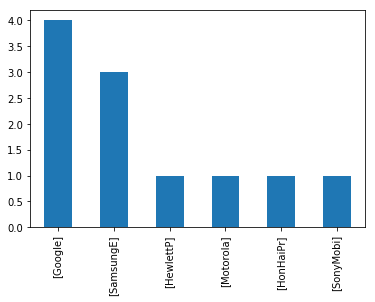

In [120]:
# Regristros por mac
def unique_vendor_count(df):
    uniques = pd.DataFrame(df.groupby('macaddr')['vendor'].apply(np.unique))
    return uniques

uniques = unique_vendor_count(df)
print(uniques)
# uniques['vendor'].value_counts().plot(kind='pie')
uniques['vendor'].value_counts().plot(kind='bar')

